In [54]:
import numpy as np
import scipy.stats
from statsmodels.stats.proportion import proportion_confint

In [46]:
array = np.zeros(shape=[49])
array = np.append(array, [1], axis=0)

In [59]:
def quantile_wilson(a, alpha=.05):
    n = len(a)
    z = scipy.stats.norm.ppf(1 - alpha / 2)
    prefix = 1 / (1 + (z ** 2) / n)
    p = sum(a) / len(a)
    add_sub = z * np.sqrt((p *(1 - p)/n) + ((z ** 2) / (4 * (n ** 2))))
    return prefix * (p + (z ** 2 / (2 * n)) - add_sub), prefix * (p + (z ** 2 / (2 * n)) + add_sub)
print('[{0[0]:.4f}, {0[1]:.4f}]'.format(quantile_wilson(array)))
proportion_confint(sum(array), len(array), alpha=.05, method='wilson')

[0.0035, 0.1050]


(0.003539259271646236, 0.10495443589637815)

In [32]:
def quantile_normal(a, alpha=.05):
    n = len(a)
    z = scipy.stats.norm.ppf(1 - alpha/2)
    p = sum(a) / n
    adder = z * np.sqrt(p * (1 - p) / n)
    return p - adder, p + adder
print('[{0[0]:.4f}, {0[1]:.4f}]'.format(quantile_normal(array)))

[-0.0188, 0.0588]


In [42]:
from statsmodels.stats.proportion import samplesize_confint_proportion
n_samples = samplesize_confint_proportion(array.mean(), half_length=.01, alpha=.05)
np.ceil(n_samples)

753.0

9603.637428852124


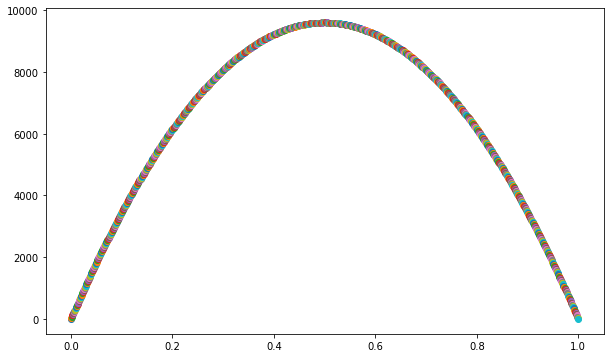

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
return_array = list()
for p in np.linspace(.0, 1, 1000):
    ret = samplesize_confint_proportion(p, half_length=.01, alpha=.05)
    return_array.append(ret)
    plt.plot(p, ret, 'o')
plt.show
print(max(return_array))